<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/Regression_guessing_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

보스턴 주택 가격 데이터셋은 연속적인 값을 예측하는 회귀(regression) 문제이다.

# 1. 데이터 살펴보기

In [1]:
# 보스턴 주택 가격 데이터셋 다운받기
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운한다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)

65536/57026 [==================================] - 0s 0us/step


In [2]:
# 데이터 형태 확인
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [3]:
y_train[:10]

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7])

데이터는 13개의 특성이 있고, 레이블은 주택 가격의 중간 가격($1000 단위)을 나타낸다. 이 전에 다루었던 데이터셋처럼 특성의 스케일이 모두 동일하면 좋겠지만, 이번 데이터셋은 그렇지 않다. 예를 들어, 범죄율 같은 특성은 비율을 나타내기에 0~1의 값을 가지지만, 방의 개수 같은 경우는 3~9의 범위를 갖는다. 이러한 스케일의 문제는 신경망의 성능에 큰 영향을 미친다. 따라서 각 데이터 특성이 갖는 범위가 다를 때에는 범위가 동일하도록 조정해야만 한다. 이러한 문제를 해결할 때 대표적으로 사용하는 방법은 표준화(Standardization)를 수행하는 것이다.

표준화는 각 데이터의 특성에 대해서 평균을 빼고, 표준펹차로 나누어 준다. 이는 특성의 평균을 0으로, 표준편차를 1로 만들어준다.

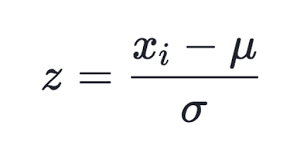

In [4]:
# 데이터 전처리 및 검증 데이터셋 만들기
import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# 검증 데이터셋을 만든다.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.33, random_state = 777)

위의 코드에서 주의해야 할 부분은 테스트셋의 전처리 과정에서 별도의 평균과 표준편차를 구하지 않고, 학습 데이터셋에서 얻은 평균과 표준편차를 사용하여 전처리를 진행했다는 점이다.

# 2. 모델 구성하기

만약 데이터가 복잡하지 않고 개수가 매우 적다면, 모델을 깊게 쌓을수록 과대적합이 일어날 확률이 높으므로 주의해야 한다. 이를 생각하며 적절한 크기의 모델을 구성하도록 한다.

In [5]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 한다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번쨰 Dense층
model.add(Dense(64, activation='relu', input_shape = (13, )))
model.add(Dense(32, activation='relu')) # 32개의 출력을 갖는 Dense층
model.add(Dense(1)) # 하나의 값을 출력한다.

model.compile(optimizer = 'adam', loss= 'mse', metrics= ['mae'])

모델의 마지막 Dense층에서 시그모이드 함수 또는 소프트맥스 함수를 사용하지 않았다. 왜냐하면 보스턴 주택 가격은 정답의 범위가 제한되지 않기 때문에 별도의 함수를 사용하지 않아야 하기 때문이다. activaiton 인자를 설정하지 않을 경우, Dense층의 활성화 함수는 자동으로 linear로 설정된다.

손실 함수는 회귀 문제에서 주로 사용되는 평균 제곱 오차(MSE: Mean Squared Error)를 사용한다. 이 함수는 정답과 예측값 사이 거리의 제곱이다.

평가지표로는 평균 절대 오차(MAE: Mean Absolute Error)를 사용했다. 회귀 문제는 분류 문제와 다른 손실 함수와 평가 지료를 사용한다.

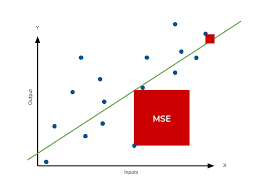

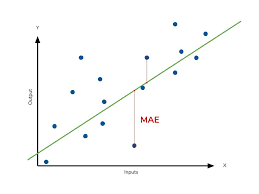

# 3. 모델 학습과 평가


In [6]:
# 학습
history = model.fit(x_train, y_train, epochs = 300, validation_data = (x_val, y_val))
model.evaluate(x_test, y_test)

Epoch 1/300
9/9 [==============================] - 1s 27ms/step - loss: 527.3445 - mae: 21.2845 - val_loss: 574.0509 - val_mae: 21.7243
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 498.0210 - mae: 20.5904 - val_loss: 541.3154 - val_mae: 20.9770
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 466.2508 - mae: 19.8202 - val_loss: 504.8604 - val_mae: 20.1102
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 429.9260 - mae: 18.9131 - val_loss: 461.8567 - val_mae: 19.0526
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 388.2457 - mae: 17.8238 - val_loss: 412.4136 - val_mae: 17.7627
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 340.3808 - mae: 16.5294 - val_loss: 357.5819 - val_mae: 16.2894
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 287.0175 - mae: 15.0166 - val_loss: 298.7782 - val_mae: 14.6032
Epoch 8/300
9/9 [==============================] - 0s 

[8.90342903137207, 2.0977935791015625]

최종 점수로 2.1 정도를 얻었다. 이는 주택의 실제 가격과 예측 가격이 평균적으로 2,200 달러 정도 차이가 있다는 것을 말한다.

데이터 개수가 적은 경우 모델의 성능을 향상시킬 수 있는 좋은 방법으로 교차 검증이 있다. 여기에서는 K-폴드 교차 검증을 사용하도록 한다. 이번 예제에서는 결과보다 K-폴드를 사용하는 방법을 중점에 두고 진행한다. 표준화 과정까지는 동일하지만, 검증 데이터셋은 직접 만들어두지 않는다. sklearn.model_selection 모듈의 KFold 함수를 통해 자동으로 생성한다.

In [9]:
# K-폴드 사용하기
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis=0)
# 여기까지는 동일
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# K-폴드를 진행한다
k = 3

# 주어진 데이터셋을 k만큼 등분한다.
# 여기서는 3이므로 학습 데이터셋(404개)을 3등분하여 한 개는 검증셋으로, 나머지 두 개는 학습 데이터셋으로 사용한다.
kfold = KFold(n_splits=k)

# k-폴드 과정에서 재사용을 위해 모델을 반환하는 함수를 정의
def get_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언한다.

# k번 진행한다.
for train_index, val_index in kfold.split(x_train):
  # 해당 인덱스는 무작위로 생성된다.
  # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법이다.
  x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  # 모델을 불러오기.
  model = get_model()

  model.fit(x_train_fold, y_train_fold, epochs = 300,
            validation_data = (x_val_fold, y_val_fold))
  
  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 23ms/step - loss: 543.4766 - mae: 21.3730 - val_loss: 515.6574 - val_mae: 20.7692
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 508.6595 - mae: 20.5668 - val_loss: 480.9406 - val_mae: 19.9202
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 468.7269 - mae: 19.6066 - val_loss: 440.3984 - val_mae: 18.9022
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 420.3224 - mae: 18.4517 - val_loss: 392.7912 - val_mae: 17.6686
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 364.7112 - mae: 17.0129 - val_loss: 335.1084 - val_mae: 16.0982
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 299.2847 - mae: 15.2110 - val_loss: 271.4678 - val_mae: 14.2147
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 232.5167 - mae: 13.1143 - val_loss: 207.4517 - val_mae: 12.0658
Epoch 8/300
9/9 [==============================] - 0s 

K-폴드 교차 검증으로 k=3으로 설정하여 진행했다. 이는 반복마다 전체 데이터를 3등분하여 두 개는 학습 데이터셋, 나머지 한 개는 검증 데이터셋으로 활용하겠다는 것을 의미한다. 또한, 모델을 반환하는 get_model() 함수를 정의하여 총 세 개의 개별적 모델을 사용하도록 했다.

In [10]:
# K-폴드 결과 확인
print(mae_list)
print(np.mean(mae_list))

[2.1574857234954834, 1.8667776584625244, 2.202263355255127]
2.0755089124043784


교차 검증을 사용하지 않은 이전 모델보다 향상된 결과를 얻었다. (2.0978 -> 2.0755)

하지만 세 개의 모델이 전부 좋은 성능을 보이진 않는다. 이러한 차이가 존재하는 이유는 전체 데이터셋은 같지만 각 폴드에서 학습 및 검증에 사용한 데이터가 다르기 때문이다. 두 번째 모델은 상대적으로 테스트 데이터와 비슷한 데이터를 학습한 경우라고 해석할 수도 있다. 이런 문제 때문에 최종적으로는 세 개 모델의 결괏값을 평균내어 사용한다. 따라서 위의 교차 검증을 활용한 방법의 최종 성능은 2.075이 된다.

교차 검증은 모델의 성능을 향상시킬 수 있는 좋은 방법이다. 하지만 이보다 중요한 것은 데이터의 특성을 잘 파악하는 것임을 명심해야 한다.